#### Demo 04: View water column data

## Introduction

This Jupyter Notebook contains an introduction to viewing water column data using Ping.

## Here you will learn

- 

## Short version

At the end of the notebook you will find the important parts of this notebook, compiled into a single cell


## ---

### First: Import the necessary modules

In [1]:
%matplotlib widget
import os
from tqdm.auto import tqdm

import numpy as np

from matplotlib import pyplot as plt
from themachinethatgoesping.echosounders import index_functions
from themachinethatgoesping.echosounders import kongsbergall
import themachinethatgoesping as Ping


In [2]:
# define a list of folder(s) to search for raw data files
folders = []

folders = ["../unittest_data/"]
folders = ["/home/data/test_data/alex_big/FOSAE-2015-BH03/"]

# find all .all/.wcd files and cache file positions
files = index_functions.find_files(folders, [".all","wcd"])
#files = index_functions.find_files(folders, ["wcd"])[20:30]
#files.extend(index_functions.find_files(folders, ["all"])[20:30])
cache_files = index_functions.get_cache_file_paths(files)

# open all files and index
fm = kongsbergall.KongsbergAllFileHandler(files,cache_files)    

Found 894 files
indexing files ⠁ 99% :16s<00m:00s] [Found: 24731178 datagrams in 894 files (453638MB)]                                                   
Initializing navigation ⠁ 97% :05s<00m:00s] [439/448]                   
Initializing ping interface ⠁ 99% :17s<00m:00s] [Done]                                              


In [3]:
all_pings = fm.get_pings()

def clear_memory():
    import gc
    gc.collect()
    
    import ctypes
    libc = ctypes.CDLL("libc.so.6") # clearing cache 
    libc.malloc_trim(0)

del fm
clear_memory()

In [16]:
wc_pings  = Ping.pingprocessing.filter_pings.by_features(all_pings, ['watercolumn','bottom.xyz'], progress=True)
print(f'{len(wc_pings)}/{len(all_pings)}')

Filter pings by features:   6%|6         | 121146/1997310 [00:02<00:30, 60572.49it/s]

1993098/1997310


Split pings by time difference:  46%|####6     | 922884/1993098 [00:02<00:02, 461439.63it/s]

66
48


  0%|          | 0/48 [00:00<?, ?it/s]

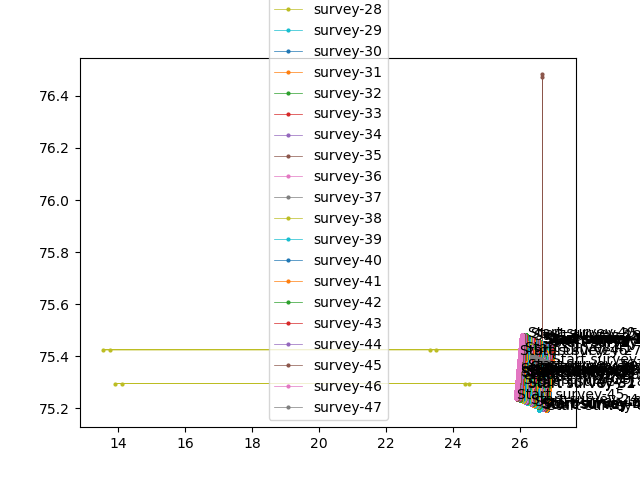

In [17]:
sections = list(Ping.pingprocessing.split_pings.by_time_difference(wc_pings,1000, progress=True).values())
print(len(sections))

tmp = sections
sections = []

for s in tmp:
    if len(s) > 10000:
        sections.append(s)

print(len(sections))

fix,ax = Ping.pingprocessing.core.create_figure('navigation')

for i,pings in enumerate(tqdm(sections)):
    overview = Ping.pingprocessing.overview.get_ping_overview(pings)
    overview.plot_navigation(ax,label = f'survey-{i}')

ax.legend()

In [35]:
pss = Ping.echosounders.pingtools.PingSampleSelector()
pss.select_beam_range_by_angles(-60,60,30)

53016
- Min time  : 2015-05-15 13:34:18.426000+00:00
- Max time  : 2015-05-15 17:46:05.494000+00:00
- Diff 15107.067999839783


 32%|###2      | 3086/9642 [00:01<00:02, 3085.74it/s]

 60%|#####9    | 5783/9641 [00:01<00:00, 5782.20it/s]

(10000, 1331)


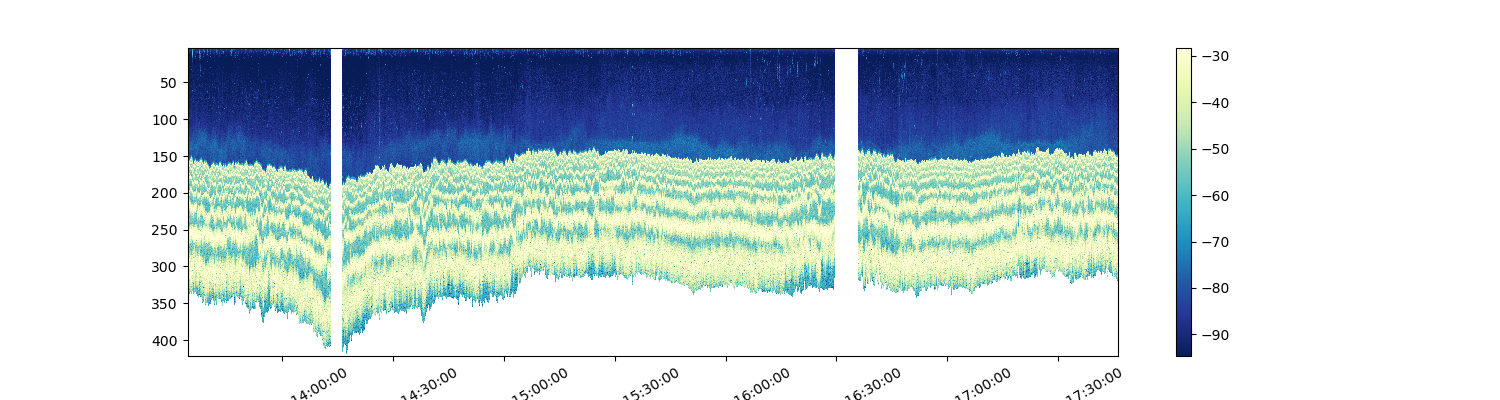

In [36]:
pings = sections[42]
print(len(pings))
builder = Ping.pingprocessing.watercolumn.echograms.EchogramBuilder(pings[1::2],pss)
echo = builder.build_time_echogram(min_delta_t_quantile=0.05)
ax,fig = echo.plot(interpolation='nearest',plot_bottom=False)
print(echo.get_data().shape)

1993098
- Min time  : 2015-05-04 22:51:13.154000+00:00
- Max time  : 2015-05-16 21:18:33.044000+00:00
- Diff 1031239.8899998665


 21%|##        | 413631/1993098 [00:01<00:03, 413628.34it/s]

 32%|###2      | 2031/6254 [00:01<00:02, 2030.46it/s]

 80%|#######9  | 4973/6253 [00:01<00:00, 4972.00it/s]

(10000, 1536)


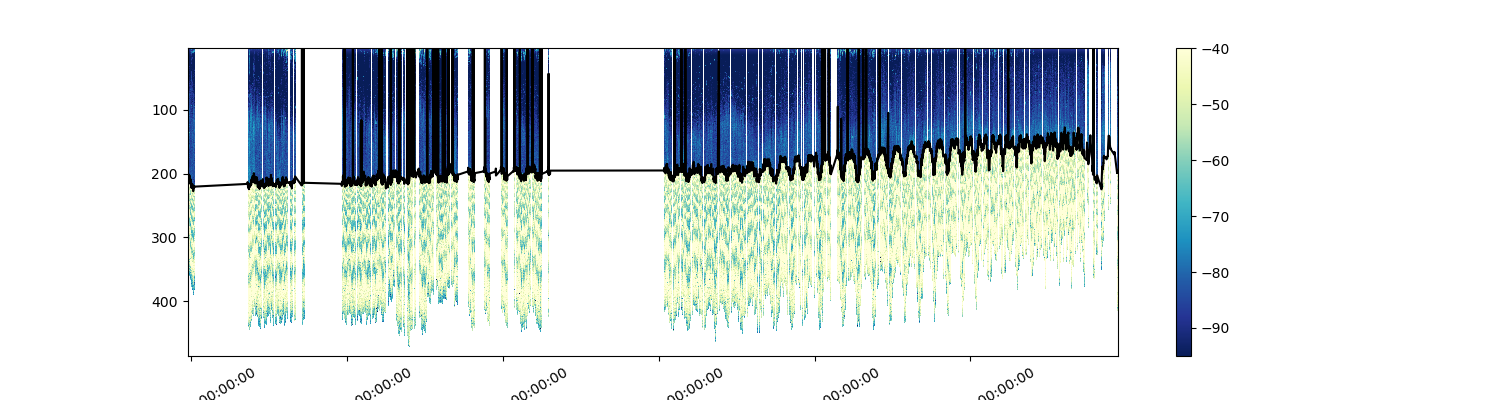

In [70]:
print(len(wc_pings))
builder = Ping.pingprocessing.watercolumn.echograms.EchogramBuilder(wc_pings[::],pss)
echo = builder.build_time_echogram(min_delta_t_quantile=0.95)
fig,ax = echo.plot(interpolation='nearest',plot_bottom=True, vmin=-95, vmax=-40)
print(echo.get_data().shape)

In [75]:
from matplotlib import dates as mdates
xmin,xmax = ax.get_xlim()
zmax,zmin = ax.get_ylim()
tmin,tmax = mdates.num2date(xmin).timestamp(), mdates.num2date(xmax).timestamp()

pss.select_beam_range_by_angles(-10,10,5)
builder = Ping.pingprocessing.watercolumn.echograms.EchogramBuilder(wc_pings[::],pss)
print(len(wc_pings))
echo2 = builder.build_time_echogram(min_delta_t_quantile=0.95,min_time = tmin, max_time = tmax, min_depth=zmin, max_depth=zmax)
fig2,ax2 = echo2.plot(interpolation='nearest',plot_bottom=True, ax=ax, colorbar=False, vmin=-95, vmax=-40)
print(echo2.get_data().shape)

1993098
- Min time  : 2015-05-12 22:13:34.558182+00:00
- Max time  : 2015-05-12 22:20:24.692945+00:00
- Diff 410.13476300239563


 25%|##5       | 498647/1993098 [00:01<00:02, 498644.74it/s]

(677, 528)


In [21]:
ping_delta_t

[0.003000020980834961,
 0.7179999351501465,
 0.003000020980834961,
 0.7070000171661377,
 0.003000020980834961,
 0.7070000171661377,
 0.002000093460083008,
 0.7070000171661377,
 0.003000020980834961,
 0.7079999446868896,
 0.0019998550415039062,
 0.7100000381469727,
 0.002000093460083008,
 0.7100000381469727,
 0.0019998550415039062,
 0.7110002040863037,
 0.0019998550415039062,
 0.7109999656677246,
 0.002000093460083008,
 0.7109999656677246,
 0.003000020980834961,
 0.7100000381469727,
 0.003000020980834961,
 0.7100000381469727,
 0.0019998550415039062,
 0.7100000381469727,
 0.003000020980834961,
 0.7079999446868896,
 0.003000020980834961,
 0.7079999446868896,
 0.002000093460083008,
 0.7079999446868896,
 0.003000020980834961,
 0.7079999446868896,
 0.003000020980834961,
 0.7090001106262207,
 0.003000020980834961,
 0.7089998722076416,
 0.002000093460083008,
 0.7100000381469727,
 0.0019998550415039062,
 0.7079999446868896,
 0.003000020980834961,
 0.7070000171661377,
 0.003000020980834961,
 0.7

In [37]:
pings[5].file_data.get_file_ping_counter()

43886

In [32]:
p.file_data.get_file_ping_counter()

43883

In [ ]:
from collections import OrderedDict

class fake_tqdm(object):
    def __init__(self, w_prg):
        self.w_prg = w_prg
        
    def __call__(self, list_like):
        self.list_like = list_like
        self.list_iter = iter(list_like)
        self.index = 0
        self.total = len(list_like)
        self.w_prg.max = self.total
        self.w_prg.value = 0
        return self
        
    def __iter__(self):
        return self
    
    def __next__(self):
        self.index += 1
        self.w_prg.value = self.index
        return next(self.list_iter)
    
    def __len__(self):
        return self.total
    
    def update(self):
        self.index += 1
        next(self.list_iter)
        self.w_prg.value = self.index
        
    def close(self):
        pass

## Filter pings
Pings must contain watercolumn amplitudes to view watercolumn data


In [ ]:
filtered_pings = Ping.pingprocessing.filter_pings.by_features(fm.get_pings(), ['watercolumn.amplitudes'],progress=True)

In [ ]:
print(len(filtered_pings))

In [ ]:
plt.close("WCI")
fig_wci = plt.figure("WCI")
ax_wci = fig_wci.subplots()

In [ ]:
from ipywidgets import *
from time import time
import themachinethatgoesping.pingprocessing.watercolumn.image as mi
import themachinethatgoesping.pingprocessing.watercolumn.helper.make_image_helper as mi_hlp

#filtered_pings, transducers = group_dual_pings(fm.get_pings.get_sorted_by_time())

fig_wci.set_tight_layout(True)

last_split_plot = 100

output = Output()

pss = Ping.echosounders.pingtools.PingSampleSelector()
#pss.select_beam_range_by_angles(-60,-30)


#@widgets.interact
#@debounce(0.1)
@output.capture()
def update(w):  
    try:
        if w_protect_stack.value:
            if w['owner'] != w_wci_stack:
                if float(w_text_execut2ion_time.value) > 0.5:
                    w_wci_stack.value = w_wci_stack.value * 0.5 / float(w_text_execution_time.value)
        if w_wci_stack.value > 1:
            w_wci.step = int(w_wci_stack.value/2)
    except Exception as e:
        pass
    
    w_text_num_total.value = str(int(w_text_num_total.value) +1)
    w_text_num_active.value = str(int(w_text_num_active.value) +1)
    
    t = time()
    global a, last_split_plot, ax_wci, fig_wci, ping1, ping2,wci
    a = w
    #print(w)
    wci_index = w_wci.value
    wci_stack = w_wci_stack.value
    wci_stack_step = w_wci_stack_step.value
    cmin = w_cmin.value
    cmax = w_cmax.value
    aspect = w_aspect.value
    hsize = w_hsize.value
    heads = w_heads.value
    interpolation = w_interpolation.value
    maxz = w_z.value
    from_bottom = w_from_bottom.value
    threshold_white = w_threshold.value
    linear_mean = w_linear_stack.value
     
    ping = filtered_pings[wci_index]
    
    if wci_stack > 1:
        max_index = wci_index+wci_stack
        if max_index > len(filtered_pings):
            max_index = len(filtered_pings)
        pings = []
        for p in filtered_pings[wci_index:max_index:wci_stack_step]:
            pings.append(p)
                
        #pings = pings[::2]
    

    try:
        if wci_stack > 1:
            wci,extent = mi.make_wci_stack(
                pings,
                hsize,
                progress_bar=progress_bar,
                linear_mean=linear_mean,
                from_bottom_xyz=from_bottom,
                mp_cores=w_cores.value)
        else:
            if heads == 'split_dual_rect':
                wci = ping.watercolumn.get_amplitudes()
                extent = [0, ping.watercolumn.get_number_of_beams(),0, ping.watercolumn.get_number_of_samples_per_beam()[0]]
            else:        
                wci,extent = mi.make_wci(
                    ping,
                    hsize,
                    from_bottom_xyz=from_bottom,
                    ping_sample_selector = pss,
                    mp_cores=w_cores.value)
        
                    
        ax_wci.clear()
            
        mapable = ax_wci.imshow(wci.transpose(),aspect=aspect, extent = extent, cmap='YlGnBu_r',vmin=cmin, vmax=cmax,interpolation=interpolation)
        
        if not heads == 'split_dual_rect':
            if not maxz == -1:
                ax_wci.set_ylim(maxz,0)
                               
        w_text_num_active.value = str(int(w_text_num_active.value) -1)
        w_text_execution_time.value = str(round(time()-t,3))
            
        
    except Exception as e:
        #print(e)
        #pass
        raise (e)


w_z = FloatSlider(min=-1, max=50, step=1, value = -1)
w_cmin = FloatSlider(min=-150, max=150, step=5, value = -90)
w_cmax = FloatSlider(min=-150, max=150, step=5, value = 50)
w_wci = IntSlider(min=0, max=len(filtered_pings)-1, step=1, value =0)
w_hsize = IntSlider(min=1, max=2048, step=1, value = 1024)

w_from_bottom = Checkbox(description="from bottom", value=False)
w_linear_stack = Checkbox(description="linear stack", value=True)
w_protect_stack = Checkbox(description="protect stacking time", value=False)
w_threshold = Checkbox(description="threshhold white", value=False)
w_av = Checkbox(description="compute AV", value=True)

w_aspect = Dropdown(options=['auto', 'equal'], value='equal')
w_heads = Dropdown(options=['blend_dual', 'blend_dual_inverse', 'split_dual', 'split_dual_rect'], value='blend_dual')
w_interpolation = Dropdown(options=['antialiased', 'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos', 'blackman'], value='nearest')
w_wci_stack = IntText(
    value=1,
    description='stack:',
    disabled=False
)
w_wci_stack_step = IntText(
    value=1,
    description='stack step:',
    disabled=False
)
w_cores = IntText(
    value=1,
    description='cores:',
    disabled=False
)

w_text_num_total = Text(
    value='0',
    placeholder='0',
    description='Total executions:',
    disabled=False   
)
w_text_num_active = Text(
    value='0',
    placeholder='0',
    description='Active executions:',
    disabled=False   
)
w_text_execution_time = Text(
    value='0',
    placeholder='0',
    description='Time of last execution:',
    disabled=False   
)
w_progress = IntProgress(
    value=0,
    min=0,
    max=10,
    step=1,
    description='Stacking:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)
progress_bar = fake_tqdm(w_progress)

box_text = HBox([w_text_num_total,w_text_num_active,w_text_execution_time])
box_options = HBox([w_aspect,w_heads,w_interpolation,w_wci_stack,w_wci_stack_step, w_cores])
box_check = HBox([w_from_bottom,w_linear_stack,w_protect_stack, w_threshold, w_av])

w_z.observe(update, names=['value'])
w_cmin.observe(update, names=['value'])
w_cmax.observe(update, names=['value'])
w_wci.observe(update, names=['value'])
w_cores.observe(update, names=['value'])
w_wci_stack.observe(update, names=['value'])
w_wci_stack_step.observe(update, names=['value'])
w_hsize.observe(update, names=['value'])
w_aspect.observe(update, names=['value'])
w_from_bottom.observe(update, names=['value'])
w_threshold.observe(update, names=['value'])
w_av.observe(update, names=['value'])
w_linear_stack.observe(update, names=['value'])
w_heads.observe(update, names=['value'])
w_interpolation.observe(update, names=['value'])


update(0)
display(fig_wci.canvas,output,w_progress, box_text, box_options, box_check, w_z, w_cmin,w_cmax,w_wci,w_hsize)

In [ ]:
2000000/10000

